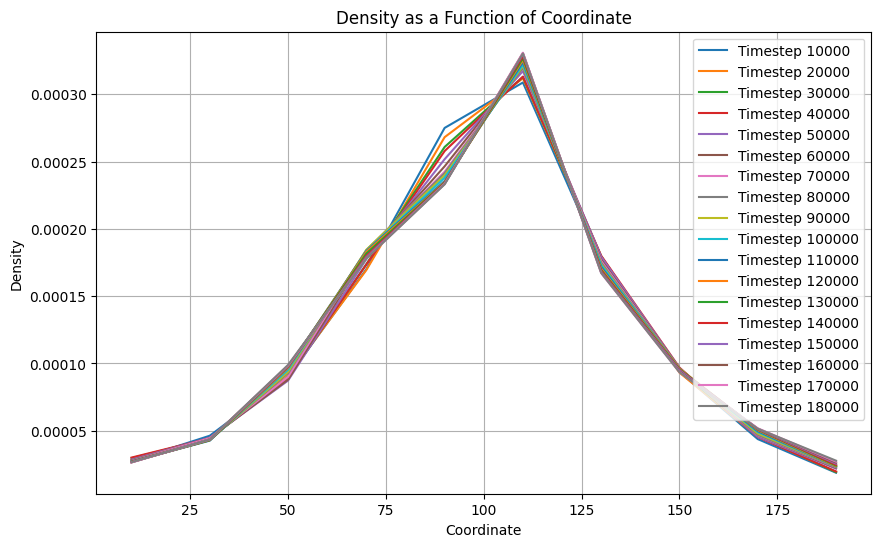

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = 'density1d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 4:
        coord = int(parts[1])
        density = float(parts[3])
        data.append([current_timestep, coord, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord', 'Density'])

# Plot the data
timesteps = df['Timestep'].unique()
plt.figure(figsize=(10, 6))

for timestep in timesteps:
    timestep_data = df[df['Timestep'] == timestep]
    plt.plot(timestep_data['Coord'], timestep_data['Density'], label=f'Timestep {timestep}')

plt.xlabel('Coordinate')
plt.ylabel('Density')
plt.title('Density as a Function of Coordinate')
plt.legend()
plt.grid(True)
plt.show()


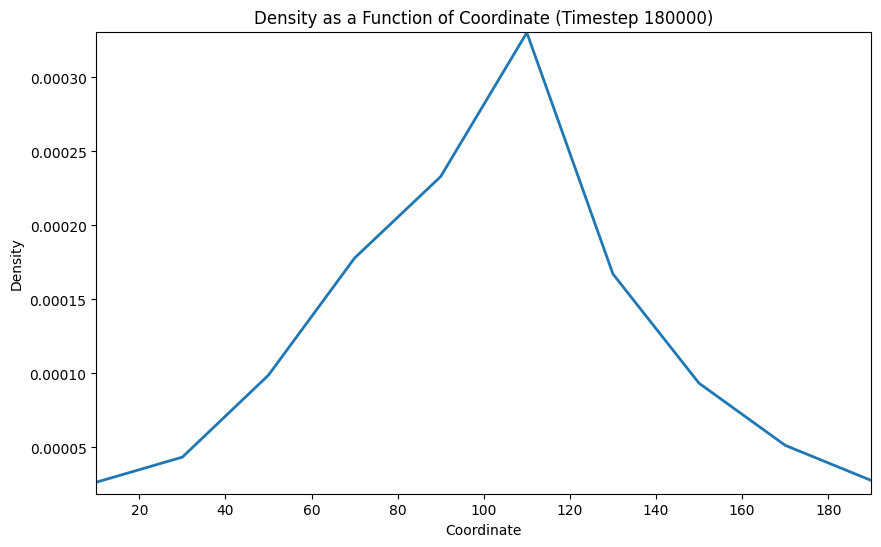

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the file path
file_path = 'density1d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 4:
        coord = int(parts[1])
        density = float(parts[3])
        data.append([current_timestep, coord, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord', 'Density'])

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], lw=2)
ax.set_xlim(df['Coord'].min(), df['Coord'].max())
ax.set_ylim(df['Density'].min(), df['Density'].max())
ax.set_xlabel('Coordinate')
ax.set_ylabel('Density')
ax.set_title('Density as a Function of Coordinate Over Time')

# Initialization function
def init():
    line.set_data([], [])
    return line,

# Animation function
def animate(timestep):
    timestep_data = df[df['Timestep'] == timestep]
    line.set_data(timestep_data['Coord'], timestep_data['Density'])
    ax.set_title(f'Density as a Function of Coordinate (Timestep {timestep})')
    return line,

# Create the animation
timesteps = sorted(df['Timestep'].unique())
ani = FuncAnimation(fig, animate, frames=timesteps, init_func=init, blit=True)

# Save or show the animation
# To save the animation as a video file:
ani.save('density_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])

# To display the animation
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the file path
file_path = 'density2d.profile'

# Read the file
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize lists to store the data
data = []
current_timestep = None
for line in lines:
    if line.startswith('#') or line.strip() == '':
        continue
    parts = line.split()
    if len(parts) == 3:
        current_timestep = int(parts[0])
    elif len(parts) == 5:  # Assuming 5 columns for timestep, chunk, coord1, coord2, and density
        coord1 = float(parts[1])
        coord2 = float(parts[2])
        density = float(parts[4])
        data.append([current_timestep, coord1, coord2, density])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Timestep', 'Coord1', 'Coord2', 'Density'])

# Determine the unique coordinates
unique_coords1 = np.sort(df['Coord1'].unique())
unique_coords2 = np.sort(df['Coord2'].unique())

# Determine the global min and max density values for colormap scaling
vmin = df['Density'].min()
vmax = df['Density'].max()

# Create a grid for the coordinates
grid_coords1, grid_coords2 = np.meshgrid(unique_coords1, unique_coords2)

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(np.zeros((len(unique_coords2), len(unique_coords1))), 
                cmap='viridis', origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
fig.colorbar(cax, ax=ax)
ax.set_xlabel('Coord1')
ax.set_ylabel('Coord2')
ax.set_title('Density as a Function of Coordinates Over Time')

# Animation function
def animate(timestep):
    timestep_data = df[df['Timestep'] == timestep]
    density_grid = np.zeros((len(unique_coords2), len(unique_coords1)))
    
    for _, row in timestep_data.iterrows():
        coord1_idx = np.where(unique_coords1 == row['Coord1'])[0][0]
        coord2_idx = np.where(unique_coords2 == row['Coord2'])[0][0]
        density_grid[coord2_idx, coord1_idx] = row['Density']
    
    cax.set_array(density_grid)
    ax.set_title(f'Density as a Function of Coordinates (Timestep {timestep})')
    cax.set_clim(vmin, vmax)  # Set the color limits
    return cax,

# Create the animation
timesteps = sorted(df['Timestep'].unique())
ani = FuncAnimation(fig, animate, frames=timesteps, blit=True)

# Save or show the animation
# To save the animation as a video file:
ani.save('density2d_animation.mp4', fps=2, extra_args=['-vcodec', 'libx264'])

# To display the animation
plt.show()

